In [2]:
'''
Train and test an actor critic across the simulated environment.
'''

import Portfolio_Gym
import gym
import numpy as np

from copy import deepcopy
from Wrapper import Wrapper
from A2C_XII import Actor_Critic
import warnings
warnings.simplefilter("ignore")

W1124 01:02:16.106411 80212 deprecation_wrapper.py:119] From C:\Users\Hli\Desktop\Hyper Tuning\A2C_XII.py:9: The name tf.disable_v2_behavior is deprecated. Please use tf.compat.v1.disable_v2_behavior instead.

W1124 01:02:16.111404 80212 deprecation.py:323] From C:\Users\Hli\Anaconda3\lib\site-packages\tensorflow\python\compat\v2_compat.py:61: disable_resource_variables (from tensorflow.python.ops.variable_scope) is deprecated and will be removed in a future version.
Instructions for updating:
non-resource variables are not supported in the long term
W1124 01:02:16.113393 80212 deprecation_wrapper.py:119] From C:\Users\Hli\Desktop\Hyper Tuning\A2C_XII.py:10: The name tf.logging.set_verbosity is deprecated. Please use tf.compat.v1.logging.set_verbosity instead.

W1124 01:02:16.114390 80212 deprecation_wrapper.py:119] From C:\Users\Hli\Desktop\Hyper Tuning\A2C_XII.py:10: The name tf.logging.ERROR is deprecated. Please use tf.compat.v1.logging.ERROR instead.



In [3]:
Env = gym.make('Historical-v0')
Env.Set_Params(Max_Leverage = 100, Min_Leverage = -100, Episode_Length = 50)

Base_Para = {'Actor_Network_Size'   : [16,8], 
             'Actor_Learning_Rate'  : 0.001, 
             'Actor_Batch'          : 200,
             'Actor_Activation'     : "tanh", 
             'Actor_Alpha'          : 0.05,
             'Actor_Epoch'          : 1,
             'Critic_Network_Size'  : [16,8],
             'Critic_Learning_Rate' : 0.001,
             'Critic_Batch'         : 200, 
             'Critic_Activation'    : 'tanh',
             'Critic_Alpha'         : 0.05,
             'Critic_Epoch'         : 3, 
             'Gamma'                : 0.999, 
             'Sigma_Range'          : [2,0.5], 
             'Sigma_Anneal'         : 1, 
             'Retrain_Frequency'    : 60,
             'Action_Space_Clip'    : 75,
             'Experiance_Mode'      : 'TD_Lambda',
             'TD_Lambda'            : 0.5,
             'Monte_Carlo_Frac'     : 0.1}

N_Eps = int(1e5)

100%|██████████| 100000/100000 [9:53:23<00:00,  2.97it/s]  


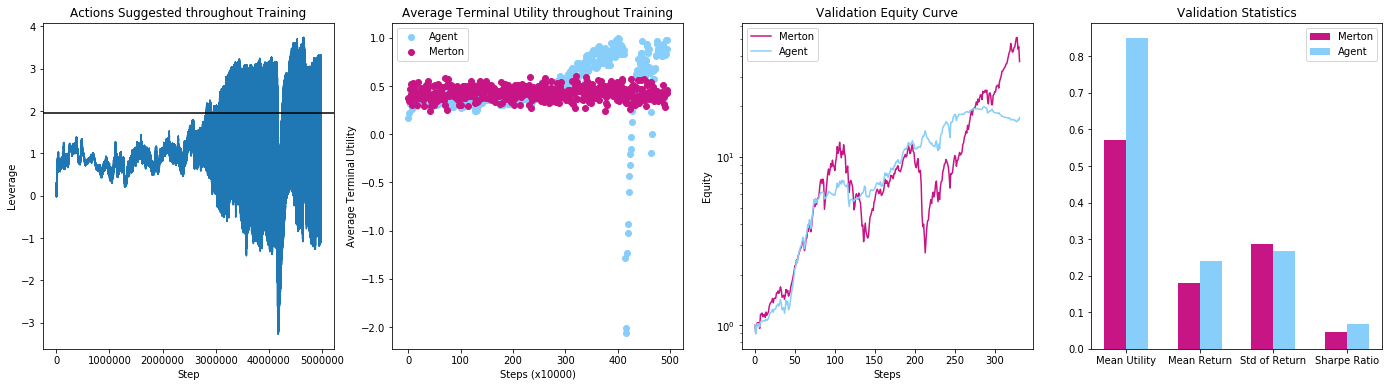

In [4]:
myAC  = Actor_Critic(Environment = Env, **Base_Para)
myWrapper = Wrapper(myAC)
myWrapper.Train(N_Eps, Plot = ['Mu', 'Merton_Benchmark'], Validate = True, Equity_Curve = True)